In [1]:
import os
import pandas as pd
import datetime as dt
import plotly.express as px
import plotly.graph_objects as go

In [2]:
CONTRACT_OPEN_ENRICHED_FILE_PATH = '../data/processed/futures_contracts/contract_open_enriched.csv'

In [3]:
def calculate_num_unique_dates_for_contract(contract_df: pd.DataFrame, symbol: str):
    # print(f"Gathering data for {symbol}")
    missing_open_for_contract_df = contract_df[contract_df['Symbol'] == symbol]
    # display(missing_open_for_contract_df)
    missing_open_dates_series_unique = missing_open_for_contract_df['Date'].unique()
    # display(missing_open_dates_series_unique)
    num_missing_open_dates_series_unique = len(missing_open_dates_series_unique)
    return num_missing_open_dates_series_unique

In [4]:
contract_open_enriched_df = pd.read_csv(CONTRACT_OPEN_ENRICHED_FILE_PATH, parse_dates=['DateTime'])

In [5]:
contract_open_enriched_df['Date'] = contract_open_enriched_df['DateTime'].apply(
        lambda x: x.strftime("%Y-%m-%d")
    )

In [6]:
contract_open_enriched_df

,Symbol,DateTime,Open Minutes Offset,Open,High,Low,Close,Volume,Intraday Open Bar Price Delta,Expiration Date,DTE,Date
0,LEG09,2007-12-14 10:59:00,54,99.900,99.900,99.900,99.900,2,NaN,2009-02-27,441,2007-12-14
1,LEG09,2008-01-08 10:12:00,7,101.525,101.525,101.525,101.525,7,NaN,2009-02-27,416,2008-01-08
2,LEG09,2008-01-11 10:08:00,3,102.000,102.000,102.000,102.000,10,NaN,2009-02-27,413,2008-01-11
3,LEG09,2008-01-11 10:54:00,49,102.900,102.900,102.900,102.900,20,NaN,2009-02-27,413,2008-01-11
4,LEG09,2008-01-11 11:01:00,56,102.900,102.900,102.900,102.900,4,NaN,2009-02-27,413,2008-01-11
...,...,...,...,...,...,...,...,...,...,...,...,...
881338,LEZ20,2020-12-31 10:15:00,45,112.875,112.875,112.875,112.875,3,0.475,2020-12-31,0,2020-12-31
881339,LEZ20,2020-12-31 10:17:00,47,112.900,112.900,112.900,112.900,2,0.500,2020-12-31,0,2020-12-31
881340,LEZ20,2020-12-31 10:18:00,48,112.900,112.900,112.900,112.900,1,0.500,2020-12-31,0,2020-12-31
881341,LEZ20,2020-12-31 10:20:00,50,112.900,112.900,112.900,112.900,7,0.500,2020-12-31,0,2020-12-31


In [7]:
rows_with_missing_open_df = contract_open_enriched_df[contract_open_enriched_df['Intraday Open Bar Price Delta'].isnull()].loc[:, contract_open_enriched_df.columns.isin(['Symbol', 'DateTime', 'DTE', 'Date'])]

In [8]:
rows_with_open_df = contract_open_enriched_df[contract_open_enriched_df['Intraday Open Bar Price Delta'].notnull()].loc[:, contract_open_enriched_df.columns.isin(['Symbol', 'DateTime', 'DTE', 'Date'])]

In [9]:
unique_symbols = rows_with_missing_open_df.Symbol.unique()

In [10]:
open_bar_by_contract_count_df = pd.DataFrame(columns=['Symbol', 'Days Without Open Bar', 'Days With Open Bar'])

In [11]:
for symbol in unique_symbols:
    num_unique_dates_with_missing_open = calculate_num_unique_dates_for_contract(
        contract_df=rows_with_missing_open_df, symbol=symbol
    )
    num_unique_dates_with_open = calculate_num_unique_dates_for_contract(
        contract_df=rows_with_open_df, symbol=symbol
    )
    open_bar_by_contract_count_df = open_bar_by_contract_count_df.append({
        'Symbol': symbol,
        'Days Without Open Bar': num_unique_dates_with_missing_open,
        'Days With Open Bar': num_unique_dates_with_open
    }, ignore_index=True)
    # print(num_unique_dates_with_missing_open)
    
    

In [12]:
open_bar_by_contract_count_df

,Symbol,Days Without Open Bar,Days With Open Bar
0,LEG09,107,146
1,LEG10,92,165
2,LEG11,94,194
3,LEG12,105,217
4,LEG13,106,225
...,...,...,...
72,LEZ16,113,232
73,LEZ17,27,287
74,LEZ18,63,278
75,LEZ19,57,277


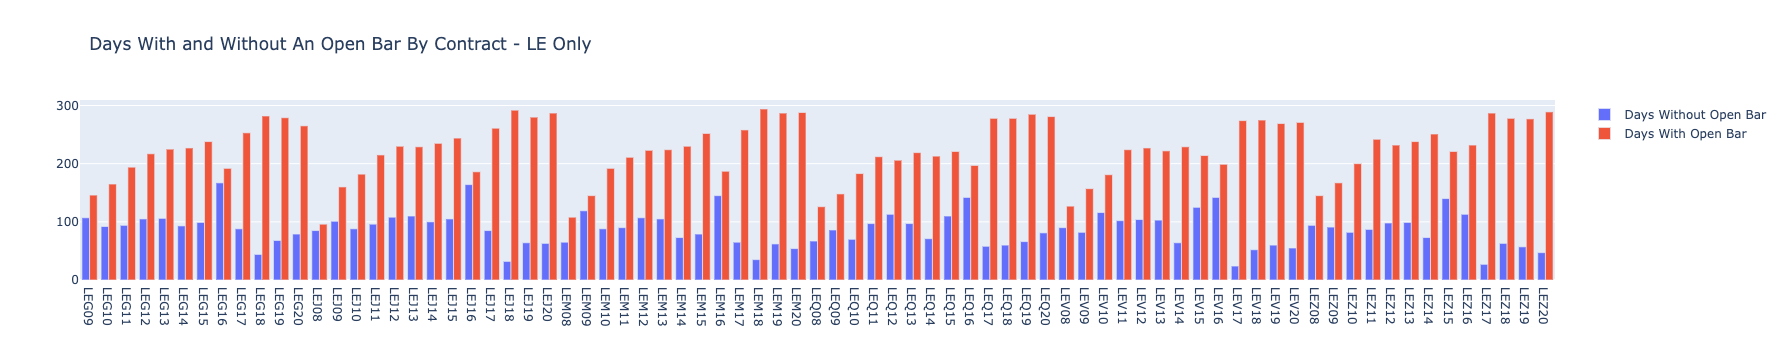

In [17]:
fig = go.Figure(data=[
    go.Bar(name='Days Without Open Bar', x=unique_symbols, y=open_bar_by_contract_count_df['Days Without Open Bar']),
    go.Bar(name='Days With Open Bar', x=unique_symbols, y=open_bar_by_contract_count_df['Days With Open Bar'])
])
# Change the bar mode
fig.update_layout(barmode='group', title_text='Days With and Without An Open Bar By Contract - LE Only')
fig.show()